In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
LIOEKF_os_cloud_node_imu = np.loadtxt(
    '../../../dataset/rosbag/newer_college/128beams/collection2/cloister/lio_ekf_01.txt', 
    usecols=(1,2,3), unpack=True)
LIOEKF_IN_PIN_os_cloud_node_imu = np.loadtxt(
    '../../../dataset/rosbag/newer_college/128beams/collection2/cloister/pin_lio_ekf_odo_os_cloud_node.txt', 
    usecols=(1,2,3), skiprows=65, unpack=True)
LIOEKF_IN_PIN_os_cloud_node_imu_newIMUProcess = np.loadtxt(
    '../../../dataset/rosbag/newer_college/128beams/collection2/cloister/pin_lio_ekf_odo_newIMUProcess.txt', 
     usecols=(1,2,3), skiprows=65, unpack=True)
LIOEKF_IN_PIN_os_cloud_node_imu_update = np.loadtxt(
    '../../../dataset/rosbag/newer_college/128beams/collection2/cloister/pin_lio_ekf_odo_update.txt', 
    usecols=(1,2,3), skiprows=65, unpack=True)
pin_odom = np.loadtxt('../../../dataset/rosbag/newer_college/128beams/collection2/cloister/odom_poses_kitti.txt', 
                      delimiter=' ', usecols=(3, 7, 11), unpack=True)
pin_slam = np.loadtxt('../../../dataset/rosbag/newer_college/128beams/collection2/cloister/slam_poses_kitti.txt',
                      delimiter=' ', usecols=(3, 7, 11), unpack=True)

In [3]:
trans = np.array([[ 1,  0,  0],
                  [ 0,  1,  0],
                  [ 0,  0, -1]])

LIOEKF_os_cloud_node_imu = trans @ LIOEKF_os_cloud_node_imu
LIOEKF_IN_PIN_os_cloud_node_imu = trans @ LIOEKF_IN_PIN_os_cloud_node_imu
LIOEKF_IN_PIN_os_cloud_node_imu_newIMUProcess = trans @ LIOEKF_IN_PIN_os_cloud_node_imu_newIMUProcess
LIOEKF_IN_PIN_os_cloud_node_imu_update = trans @ LIOEKF_IN_PIN_os_cloud_node_imu_update

pin_odom = trans @ pin_odom
pin_slam = trans @ pin_slam

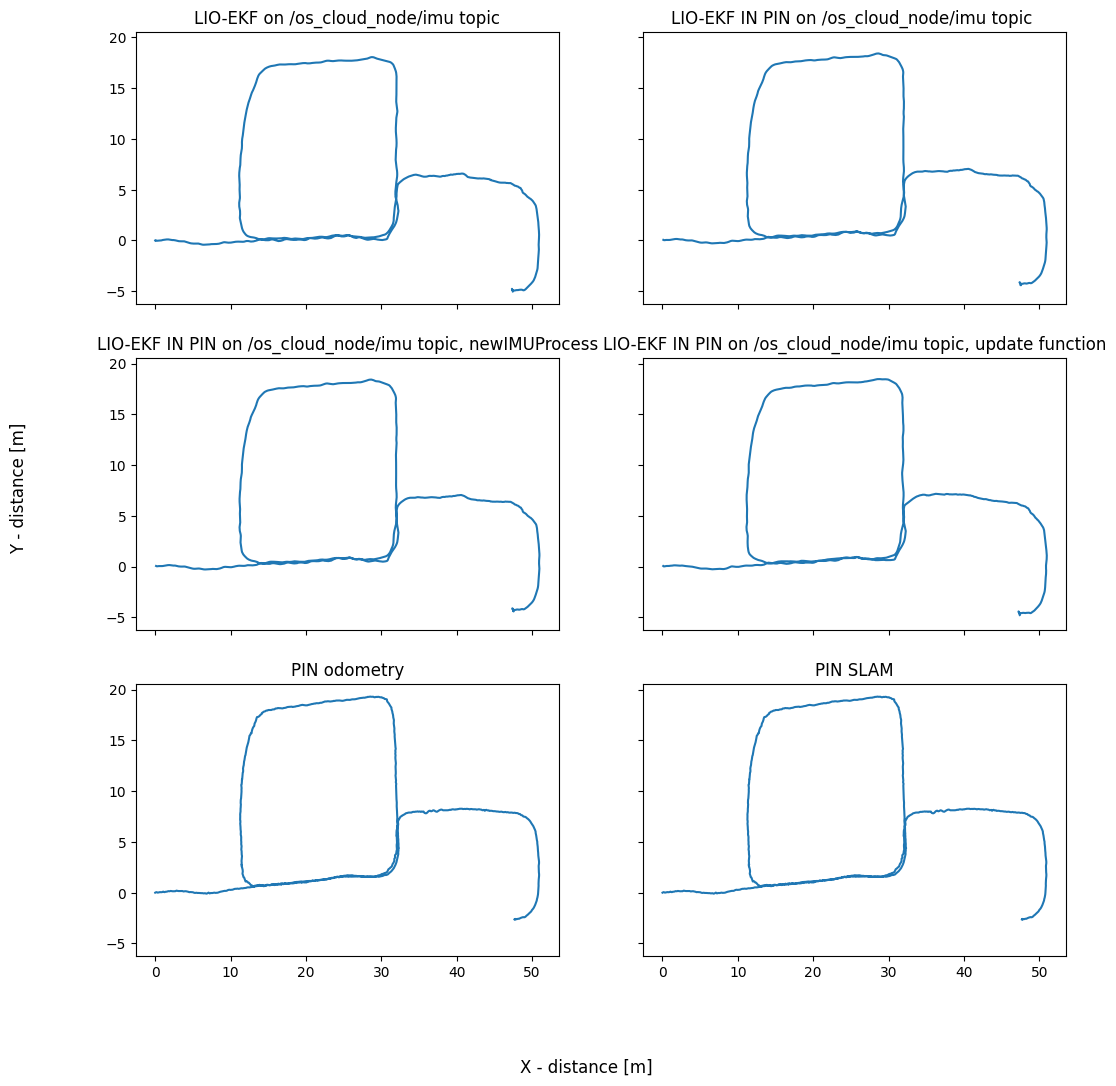

In [4]:
figure, axis = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(12, 12))

axis[0][0].plot(LIOEKF_os_cloud_node_imu[0], LIOEKF_os_cloud_node_imu[1])
axis[0][0].set_title("LIO-EKF on /os_cloud_node/imu topic")
axis[0][1].plot(LIOEKF_IN_PIN_os_cloud_node_imu[0], LIOEKF_IN_PIN_os_cloud_node_imu[1])
axis[0][1].set_title("LIO-EKF IN PIN on /os_cloud_node/imu topic ")
axis[1][0].plot(LIOEKF_IN_PIN_os_cloud_node_imu_newIMUProcess[0], LIOEKF_IN_PIN_os_cloud_node_imu_newIMUProcess[1])
axis[1][0].set_title("LIO-EKF IN PIN on /os_cloud_node/imu topic, newIMUProcess")
axis[1][1].plot(LIOEKF_IN_PIN_os_cloud_node_imu_update[0], LIOEKF_IN_PIN_os_cloud_node_imu_update[1])
axis[1][1].set_title("LIO-EKF IN PIN on /os_cloud_node/imu topic, update function")
axis[2][0].plot(pin_odom[0], pin_odom[1])
axis[2][0].set_title("PIN odometry")
axis[2][1].plot(pin_slam[0], pin_slam[1])
axis[2][1].set_title("PIN SLAM")

figure.supxlabel('X - distance [m]')
figure.supylabel('Y - distance [m]')
plt.show()

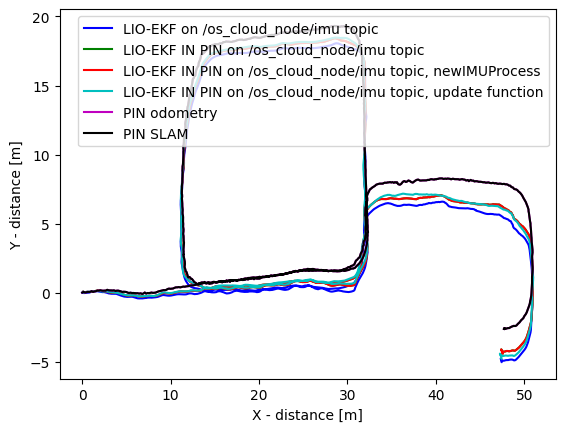

In [5]:
plt.plot(LIOEKF_os_cloud_node_imu[0], LIOEKF_os_cloud_node_imu[1], label='LIO-EKF on /os_cloud_node/imu topic', color='b') 
plt.plot(LIOEKF_IN_PIN_os_cloud_node_imu[0], LIOEKF_IN_PIN_os_cloud_node_imu[1], label='LIO-EKF IN PIN on /os_cloud_node/imu topic', color='g') 
plt.plot(LIOEKF_IN_PIN_os_cloud_node_imu_newIMUProcess[0], LIOEKF_IN_PIN_os_cloud_node_imu_newIMUProcess[1], 
         label='LIO-EKF IN PIN on /os_cloud_node/imu topic, newIMUProcess', color='r') 
plt.plot(LIOEKF_IN_PIN_os_cloud_node_imu_update[0], LIOEKF_IN_PIN_os_cloud_node_imu_update[1], 
         label='LIO-EKF IN PIN on /os_cloud_node/imu topic, update function', color='c') 
plt.plot(pin_odom[0], pin_odom[1], label='PIN odometry', color='m') 
plt.plot(pin_slam[0], pin_slam[1], label='PIN SLAM', color='k') 

plt.legend()
plt.rcParams["figure.figsize"] = (16, 16)

plt.xlabel('X - distance [m]')
plt.ylabel('Y - distance [m]')
plt.show()

# PLOT HEIGHT

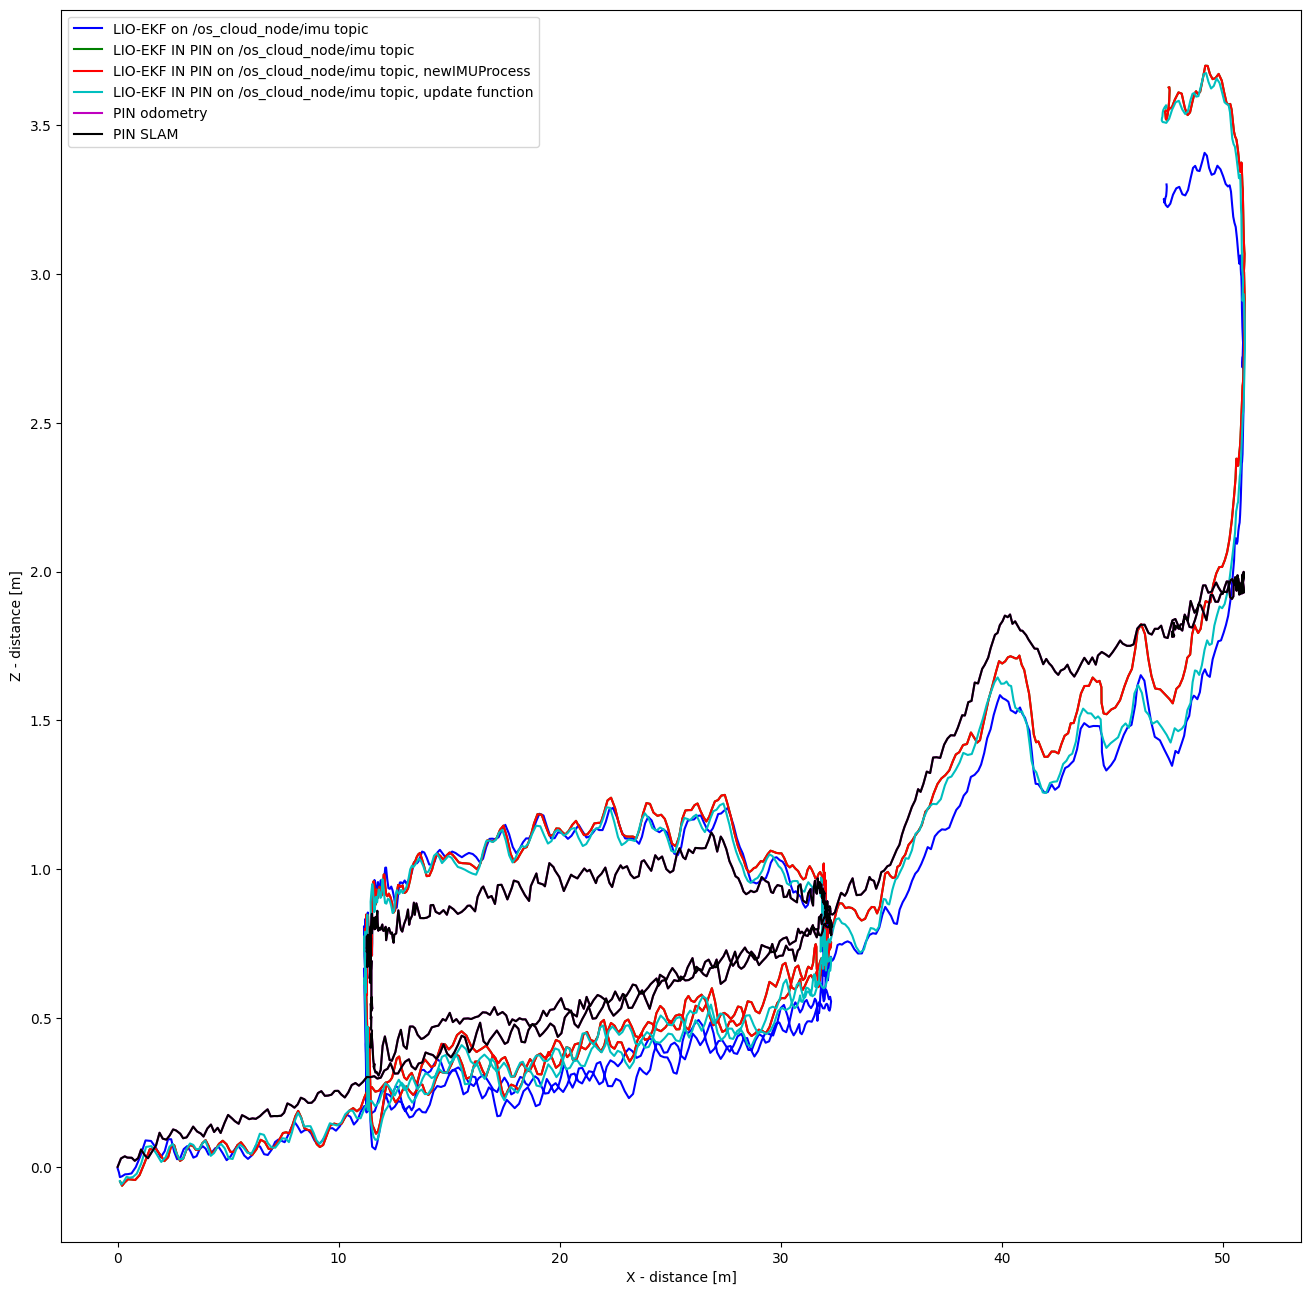

In [6]:
plt.plot(LIOEKF_os_cloud_node_imu[0], LIOEKF_os_cloud_node_imu[2], label='LIO-EKF on /os_cloud_node/imu topic', color='b') 
plt.plot(LIOEKF_IN_PIN_os_cloud_node_imu[0], LIOEKF_IN_PIN_os_cloud_node_imu[2], label='LIO-EKF IN PIN on /os_cloud_node/imu topic', color='g') 
plt.plot(LIOEKF_IN_PIN_os_cloud_node_imu_newIMUProcess[0], LIOEKF_IN_PIN_os_cloud_node_imu_newIMUProcess[2]
         , label='LIO-EKF IN PIN on /os_cloud_node/imu topic, newIMUProcess', color='r') 
plt.plot(LIOEKF_IN_PIN_os_cloud_node_imu_update[0], LIOEKF_IN_PIN_os_cloud_node_imu_update[2]
         , label='LIO-EKF IN PIN on /os_cloud_node/imu topic, update function', color='c') 
plt.plot(pin_odom[0], pin_odom[2], label='PIN odometry', color='m')
plt.plot(pin_slam[0], pin_slam[2], label='PIN SLAM', color='k') 

plt.legend()
plt.rcParams["figure.figsize"] = (16, 16)

plt.xlabel('X - distance [m]')
plt.ylabel('Z - distance [m]')
plt.show()

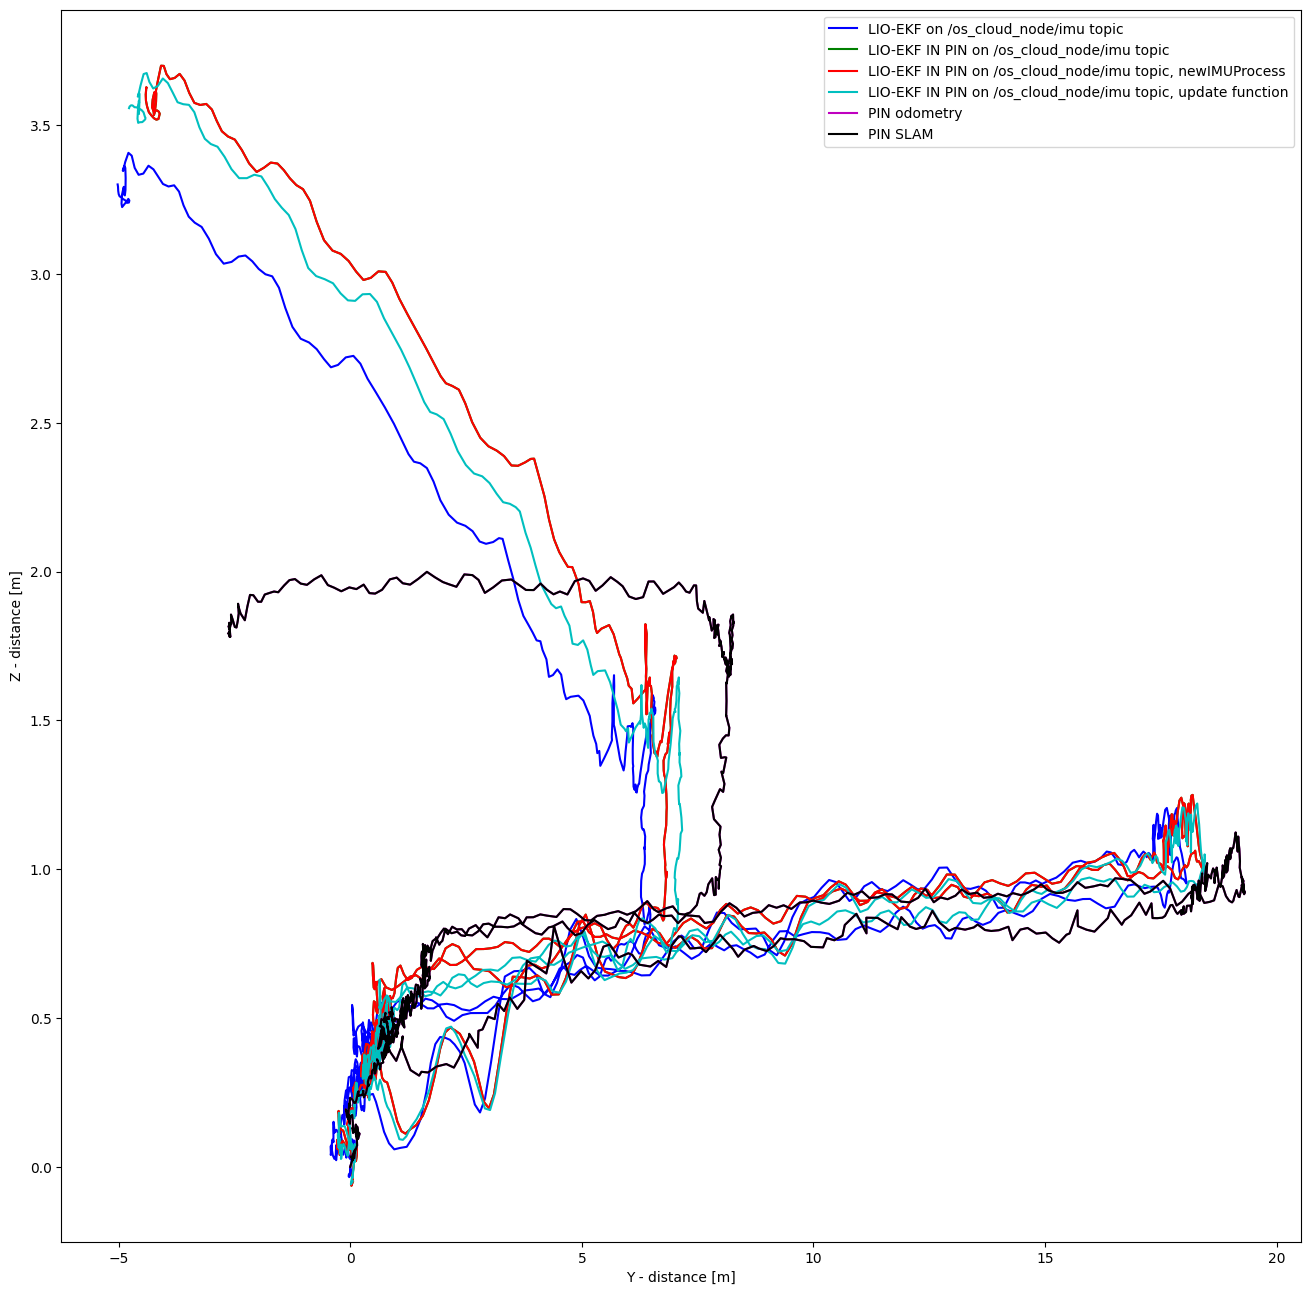

In [7]:
plt.plot(LIOEKF_os_cloud_node_imu[1], LIOEKF_os_cloud_node_imu[2], label='LIO-EKF on /os_cloud_node/imu topic', color='b') 
plt.plot(LIOEKF_IN_PIN_os_cloud_node_imu[1], LIOEKF_IN_PIN_os_cloud_node_imu[2], label='LIO-EKF IN PIN on /os_cloud_node/imu topic', color='g') 
plt.plot(LIOEKF_IN_PIN_os_cloud_node_imu_newIMUProcess[1], LIOEKF_IN_PIN_os_cloud_node_imu_newIMUProcess[2]
         , label='LIO-EKF IN PIN on /os_cloud_node/imu topic, newIMUProcess', color='r') 
plt.plot(LIOEKF_IN_PIN_os_cloud_node_imu_update[1], LIOEKF_IN_PIN_os_cloud_node_imu_update[2]
         , label='LIO-EKF IN PIN on /os_cloud_node/imu topic, update function', color='c') 
plt.plot(pin_odom[1], pin_odom[2], label='PIN odometry', color='m')
plt.plot(pin_slam[1], pin_slam[2], label='PIN SLAM', color='k') 

plt.legend()
plt.rcParams["figure.figsize"] = (16, 16)

plt.xlabel('Y - distance [m]')
plt.ylabel('Z - distance [m]')
plt.show()

# PLOT ORIENTATION

In [16]:
idx = 2
LIOEKF_os_cloud_node_imu = np.loadtxt(
    '../../../dataset/rosbag/newer_college/128beams/collection2/cloister/lio_ekf_01.txt', 
    usecols=(0,4,5,6), unpack=True)[:, :idx]
LIOEKF_IN_PIN_os_cloud_node_imu = np.loadtxt(
    '../../../dataset/rosbag/newer_college/128beams/collection2/cloister/pin_lio_ekf_odo_os_cloud_node.txt', 
    usecols=(0,4,5,6), skiprows=63, unpack=True)[:, :idx]
LIOEKF_IN_PIN_os_cloud_node_imu_newIMUProcess = np.loadtxt(
    '../../../dataset/rosbag/newer_college/128beams/collection2/cloister/pin_lio_ekf_odo_newIMUProcess.txt', 
     usecols=(0,4,5,6), skiprows=63, unpack=True)[:, :idx]
LIOEKF_IN_PIN_os_cloud_node_imu_update = np.loadtxt(
    '../../../dataset/rosbag/newer_college/128beams/collection2/cloister/pin_lio_ekf_odo_update.txt', 
    usecols=(0,4,5,6), skiprows=63, unpack=True)[:, :idx]

In [17]:
LIOEKF_os_cloud_node_imu

array([[ 1.63844035e+09,  1.63844035e+09],
       [-2.02715380e-03,  1.97847374e-02],
       [-4.13363236e-02, -1.07774317e-01],
       [-1.71401830e-01, -3.02379515e-01]])

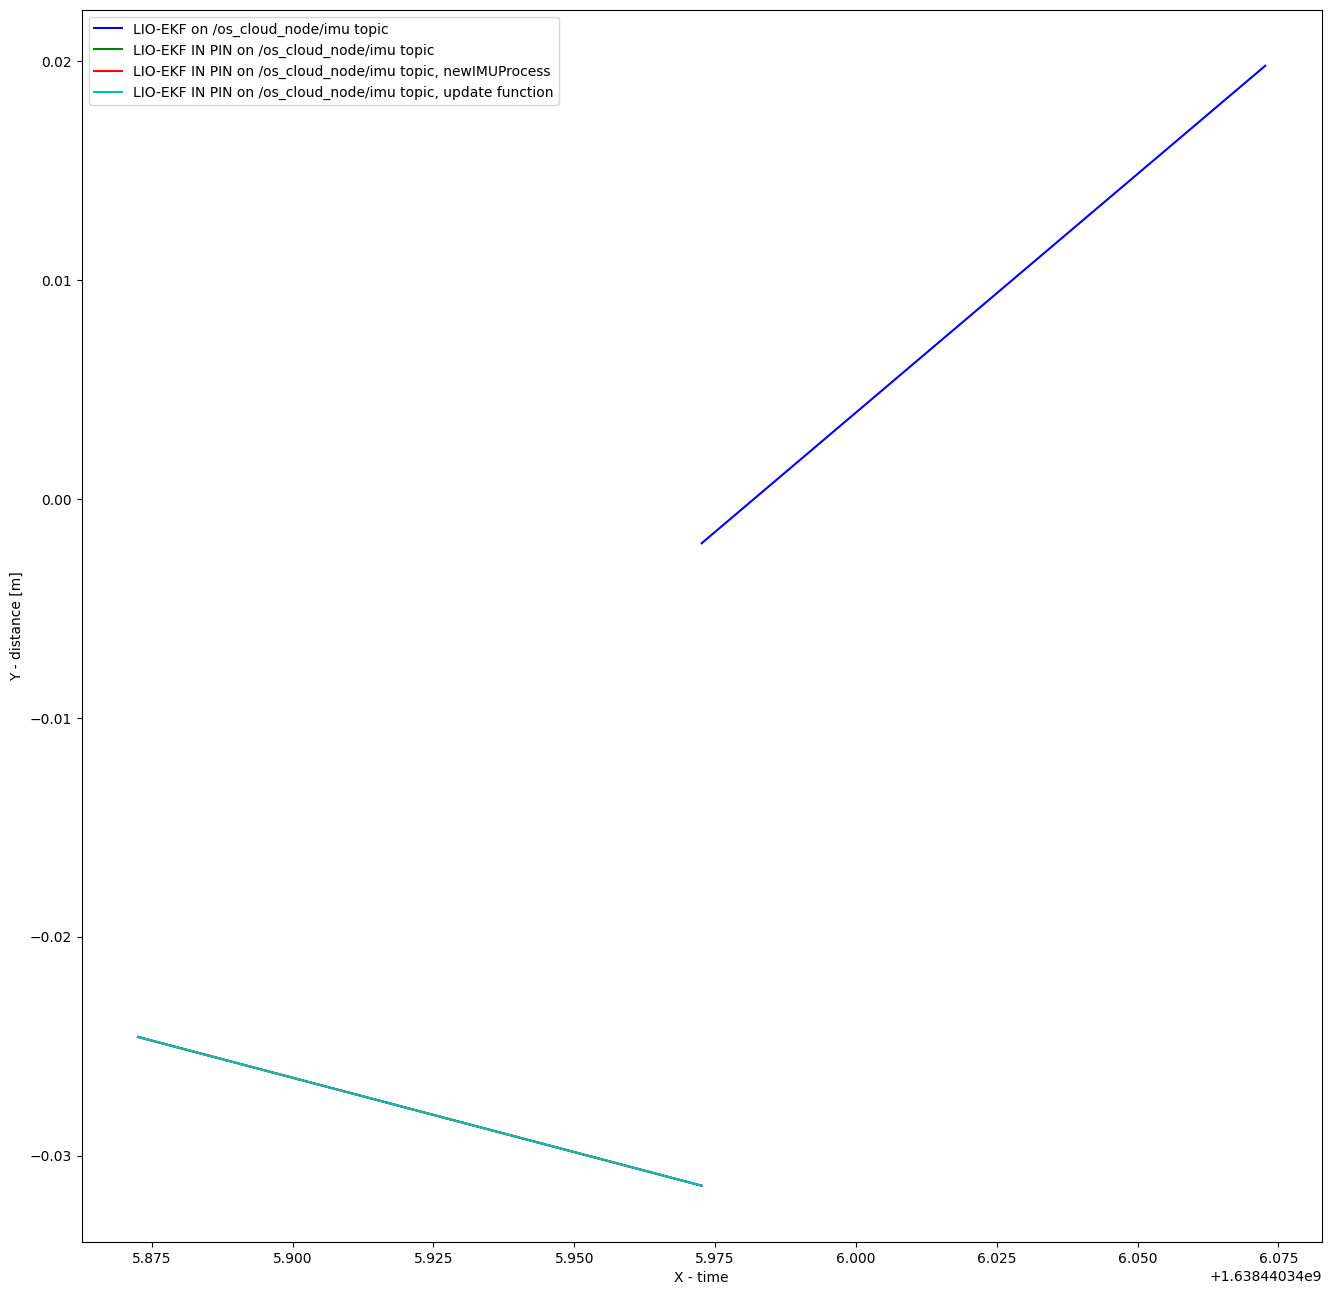

In [10]:
row = 1
plt.plot(LIOEKF_os_cloud_node_imu[0], LIOEKF_os_cloud_node_imu[row], label='LIO-EKF on /os_cloud_node/imu topic', color='b')
plt.plot(LIOEKF_IN_PIN_os_cloud_node_imu[0], LIOEKF_IN_PIN_os_cloud_node_imu[row], label='LIO-EKF IN PIN on /os_cloud_node/imu topic', color='g')
plt.plot(LIOEKF_IN_PIN_os_cloud_node_imu_newIMUProcess[0], LIOEKF_IN_PIN_os_cloud_node_imu_newIMUProcess[row], 
         label='LIO-EKF IN PIN on /os_cloud_node/imu topic, newIMUProcess', color='r')
plt.plot(LIOEKF_IN_PIN_os_cloud_node_imu_update[0], LIOEKF_IN_PIN_os_cloud_node_imu_update[row], 
         label='LIO-EKF IN PIN on /os_cloud_node/imu topic, update function', color='c')
# plt.plot(pin_odom[0], pin_odom[1], label='PIN odometry', color='m') 
# plt.plot(pin_slam[0], pin_slam[1], label='PIN SLAM', color='k') 

plt.legend()
plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel('X - time')
plt.ylabel('Y - distance [m]')
plt.show()